In [1]:
import torch
import numpy as np

import h5py
import matplotlib.pyplot as plt

In [2]:
def normalized_rmse(predictions, true_values):
  """
  Calculates the Normalized Root Mean Squared Error (nRMSE).

  Args:
    predictions: A array containing the predicted values.
    true_values: A array containing the true values.

  Returns:
    The normalized root mean squared error.
  """
  #print(predictions.shape, true_values.shape)

  rmse = torch.sqrt(torch.mean((predictions - true_values) ** 2, dim = 1 ) )

  nrmse = rmse /   torch.sqrt(torch.mean((true_values) ** 2, dim = 1) )    #torch.std(true_values)
  #return torch.mean(nrmse)
  return nrmse

In [25]:
def analyze_result(file_loc):
    res = torch.load(file_loc, map_location="cpu")
    print(res.keys())
    try:
        prediction_B1_cons = res["train_ro_250"][1]
        actual_B1_cons = res["train_ro_250"][2]
        #print( res["test_cons_ro_250"][3][0])
        nrmse_cons = normalized_rmse(prediction_B1_cons, actual_B1_cons)
        train_cons = [nrmse_cons, prediction_B1_cons, actual_B1_cons]
    except:
        train_cons = [0,0,0]
    try:
        prediction_B1_cons = res["test_ro"][1]
        actual_B1_cons = res["test_ro"][2]
        #print( res["test_cons_ro_250"][3][0])
        nrmse_cons = normalized_rmse(prediction_B1_cons, actual_B1_cons)
        test_cons = [nrmse_cons, prediction_B1_cons, actual_B1_cons]
    except:
        test_cons = [0,0,0]

    
    return train_cons, test_cons

In [4]:
file_loc = "/mnt/scratch/scoc/constant_autoregression/result/B1/constant_time/fixed_ar_test/run_8/errors.pt"
test_auto_ar = torch.load(file_loc, map_location="cpu")

In [5]:
file_loc = "/mnt/scratch/scoc/constant_autoregression/result/B1/constant_time/ar_curriculum_test/run_8/errors.pt"
test_auto_ar_cur = torch.load(file_loc, map_location="cpu")

In [6]:
file_loc = "/mnt/scratch/scoc/constant_autoregression/result/B1/constant_time/tf_test/run_1/errors.pt"
test_auto_tf = torch.load(file_loc, map_location="cpu")

In [7]:
file_loc = "/mnt/scratch/scoc/constant_autoregression/result/B1/constant_time/tf_with_noise_test/run_1/errors.pt"
test_auto_tf_noise = torch.load(file_loc, map_location="cpu")

In [8]:
file_loc = "/mnt/scratch/scoc/constant_autoregression/result/B1/constant_time/ar_tf_curriculum_test/run_2/errors.pt"
test_auto_ar_tf = torch.load(file_loc, map_location="cpu")

In [9]:
file_loc = "/mnt/scratch/scoc/constant_autoregression/result/B1/constant_time/ar_tf_noise_curriculum_test/run_2/errors.pt"
test_auto_ar_tf_noise = torch.load(file_loc, map_location="cpu")

In [10]:
file_loc = "/mnt/scratch/scoc/constant_autoregression/result/B1/constant_time/prob_tf_ar_curriculum_test/run_2/errors.pt"
test_auto_tf_ar_prob = torch.load(file_loc, map_location="cpu")

In [11]:
file_loc = "/mnt/scratch/scoc/constant_autoregression/result/B1/constant_time/prob_ar_tf_curriculum_test/run_2/errors.pt"
test_auto_ar_tf_prob = torch.load(file_loc, map_location="cpu")

In [12]:
file_loc = "/mnt/scratch/scoc/constant_autoregression/result/B1/constant_time/stwl_curriculum_test/run_3_fastest_trans/errors.pt"
test_auto_stwl = torch.load(file_loc, map_location="cpu")

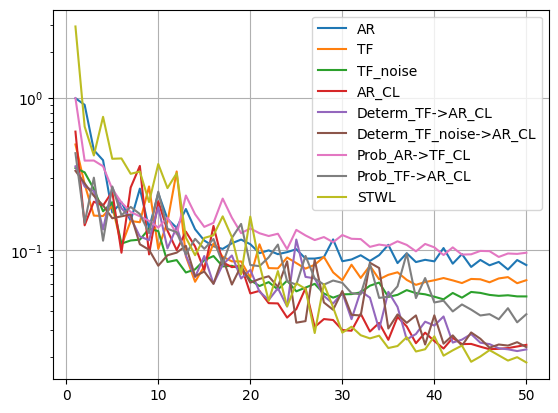

In [13]:
plt.plot(torch.arange(1,51), test_auto_ar[:,4], label="AR" )
plt.plot(torch.arange(1,51), test_auto_tf[:,4], label = "TF" )
plt.plot(torch.arange(1,51), test_auto_tf_noise[:,4], label = "TF_noise" )
plt.plot(torch.arange(1,51), test_auto_ar_cur[:,4], label="AR_CL" )
plt.plot(torch.arange(1,51), test_auto_ar_tf[:,4], label="Determ_TF->AR_CL" )
plt.plot(torch.arange(1,51), test_auto_ar_tf_noise[:,4], label="Determ_TF_noise->AR_CL" )
plt.plot(torch.arange(1,51), test_auto_ar_tf_prob[:,4], label="Prob_AR->TF_CL" )
plt.plot(torch.arange(1,51), test_auto_tf_ar_prob[:,4], label="Prob_TF->AR_CL" )
plt.plot(torch.arange(1,51), test_auto_stwl[:,4], label = "STWL" )
#plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.grid()

In [10]:
file_loc = "/mnt/scratch/scoc/constant_autoregression/result/B1/FNO/AR/run_2_ss_1/errors.pt"
ar_errors = torch.load(file_loc, map_location="cpu")

In [9]:
file_loc = "/mnt/scratch/scoc/constant_autoregression/result/B1/FNO/AR_curriculum/run_2_ss_1/errors.pt"
ar_c_errors = torch.load(file_loc, map_location="cpu")

In [8]:
file_loc = "/mnt/scratch/scoc/constant_autoregression/result/B1/FNO/STWL_curriculum/run_2_ss_1/errors.pt"
stwl_errors = torch.load(file_loc, map_location="cpu")

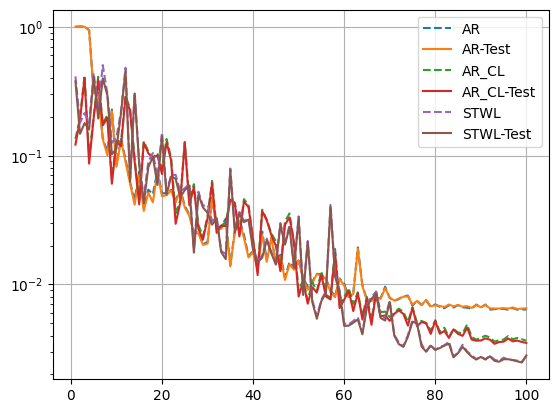

In [20]:
plt.plot(torch.arange(1,101), ar_errors[:,4], "--", label="AR")
plt.plot(torch.arange(1,101), ar_errors[:,8], label="AR-Test")
#plt.plot(torch.arange(1,51), test_auto_tf[:,4], label = "TF" )
#plt.plot(torch.arange(1,51), test_auto_tf_noise[:,4], label = "TF_noise" )
plt.plot(torch.arange(1,101), ar_c_errors[:,4], "--" , label="AR_CL")
plt.plot(torch.arange(1,101), ar_c_errors[:,8], label="AR_CL-Test")
#plt.plot(torch.arange(1,51), test_auto_ar_tf[:,4], label="Determ_TF->AR_CL" )
# plt.plot(torch.arange(1,51), test_auto_ar_tf_noise[:,4], label="Determ_TF_noise->AR_CL" )
# plt.plot(torch.arange(1,51), test_auto_ar_tf_prob[:,4], label="Prob_AR->TF_CL" )
# plt.plot(torch.arange(1,51), test_auto_tf_ar_prob[:,4], label="Prob_TF->AR_CL" )
plt.plot(torch.arange(1,101), stwl_errors[:,4], "--" , label = "STWL")
plt.plot(torch.arange(1,101), stwl_errors[:,8], label = "STWL-Test")
#plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.grid()

In [49]:
file_loc = "/mnt/scratch/scoc/constant_autoregression/result/E1/FNO/TF_AR_Prob/run_1/run_1_best_epoch_proto_1.pt"
test_ar = analyze_result(file_loc)

dict_keys(['train_oto', 'train_ro', 'valid_oto', 'valid_ro', 'test_oto', 'test_ro'])


In [48]:
torch.mean(test_ar[1][0])

tensor(0.3297)

In [58]:
file_loc = "/mnt/scratch/scoc/constant_autoregression/result/E1/FNO/AR_curriculum/run_1/run_1_best_epoch_proto_1.pt"
test_ar_cur = analyze_result(file_loc)

dict_keys(['train_oto', 'train_ro', 'valid_oto', 'valid_ro', 'test_oto', 'test_ro'])


In [28]:
test_ar_cur[1][1].shape

torch.Size([128, 256, 196])

In [71]:
torch.mean(test_ar_cur[1][0])

tensor(0.2439)

In [57]:
file_loc = "/mnt/scratch/scoc/constant_autoregression/result/E1/FNO/STWL_curriculum/run_1/run_1_best_epoch_proto_1.pt"
test_stwl = analyze_result(file_loc)

dict_keys(['train_oto', 'train_ro', 'valid_oto', 'valid_ro', 'test_oto', 'test_ro'])


In [38]:
test_stwl[1][0][...,3:].shape

torch.Size([128, 196])

In [72]:
torch.mean(test_stwl[1][0])

tensor(0.2418)

In [40]:
test_ar[1][2].shape

torch.Size([128, 256, 199])

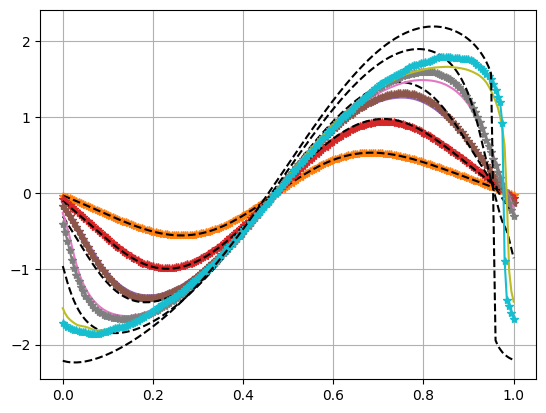

In [70]:
samp = 50
for t in range(0,250,50):
    #plt.plot(torch.linspace(0,1,256), test_ar[1][1][samp,:,t])
    plt.plot(torch.linspace(0,1,200), test_ar_cur[1][1][samp,:,t])
    plt.plot(torch.linspace(0,1,200), test_stwl[1][1][samp,:,t], "*-")
    plt.plot(torch.linspace(0,1,200), test_ar_cur[1][2][samp,:,t], "k--")
plt.grid()

In [ ]:
samp = 32
for t in range(0,200,20):
    plt.plot(torch.linspace(0,1,256), test_auto_ar[1][0,:,t])
    plt.plot(torch.linspace(0,1,256), test_auto_ar_cur[1][0,:,t])
    plt.plot(torch.linspace(0,1,256), test_auto_ar[2][0,:,t], "k--")
plt.grid()

In [17]:
file_loc = "result/A1/constant_time/dt_1_ms_1_horizon_1/run_1/run_1_result_prior_dt1_3.pt"
test_dim_32 = analyze_result(file_loc)

In [12]:
file_loc = "/nobackup/scoc/variable_autoregression/result/A1/constant_time/dt_1_ms_1_horizon_1/run_1_dim_32_1/run_1_dim_32_1_result_prior_dt1_3.pt"
test_dim_32_1 = analyze_result(file_loc)

In [19]:
file_loc = "/nobackup/scoc/variable_autoregression/result/A1/constant_time/dt_1_ms_1_horizon_1/run_1_dim_32_2/run_1_dim_32_2_result_prior_dt1_3.pt"
test_dim_32_2 = analyze_result(file_loc)

In [13]:
test_dim_32_1[0][0][1].shape

torch.Size([2048, 256, 200])

In [7]:
file_loc = "/nobackup/scoc/variable_autoregression/result/B1/constant_time/dt_1_ms_10_horizon_3/run_2_iteration_200/run_2_iteration_200_result_prior_dt1_3.pt"
test_cons_iter_200 = analyze_result(file_loc)

In [8]:
file_loc = "/nobackup/scoc/variable_autoregression/result/B1/variable_time/B1_1_FNO_attention/run_6_iteration_200/run_6_iteration_200_result_prior_dt1_3.pt"
test_var_iter_200 = analyze_result(file_loc)

In [14]:
test_dim_32_1[0][0][0].shape

torch.Size([2048, 200])

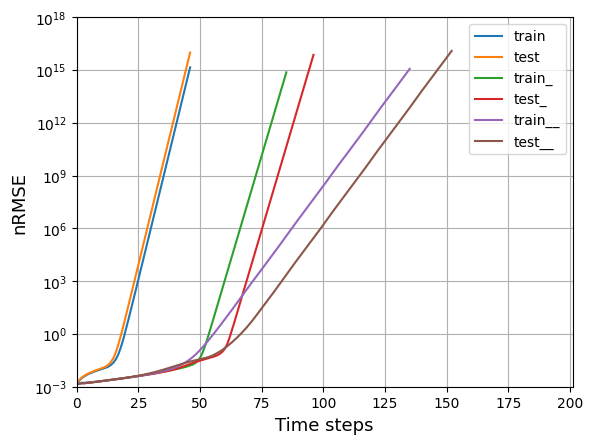

In [26]:
plt.plot(torch.arange(1,201), torch.mean(test_dim_32_1[0][0][0], dim=0), label="train" )
plt.plot(torch.arange(1,201), torch.mean(test_dim_32_1[0][1][0], dim=0), label="test" )

plt.plot(torch.arange(1,201), torch.mean(test_dim_32[0][0][0], dim=0), label="train_" )
plt.plot(torch.arange(1,201), torch.mean(test_dim_32[0][1][0], dim=0), label="test_" )

plt.plot(torch.arange(1,201), torch.mean(test_dim_32_2[0][0][0], dim=0), label="train__" )
plt.plot(torch.arange(1,201), torch.mean(test_dim_32_2[0][1][0], dim=0), label="test__" )

plt.legend()
plt.yscale("log")
plt.ylim([1e-3,1e18])
plt.xlim([0,201])
plt.xlabel("Time steps", fontsize="13")
plt.ylabel("nRMSE", fontsize="13")
plt.grid()

In [39]:
file_loc = "/nobackup/scoc/variable_autoregression/result/A1/constant_time/dt_1_ms_1_horizon_1/run_1_dim_64/run_1_dim_64_result_prior_dt1_3.pt"
test_dim_64 = analyze_result(file_loc)

In [30]:
file_loc = "/nobackup/scoc/variable_autoregression/result/A1/constant_time/dt_1_ms_1_horizon_1/run_1_dim_64_1/run_1_dim_64_1_result_prior_dt1_3.pt"
test_dim_64_1 = analyze_result(file_loc)

In [36]:
test_dim_64[0][1][0].shape

torch.Size([128, 200])

In [40]:
test_dim_64[0][0][0].shape

torch.Size([2048, 200])

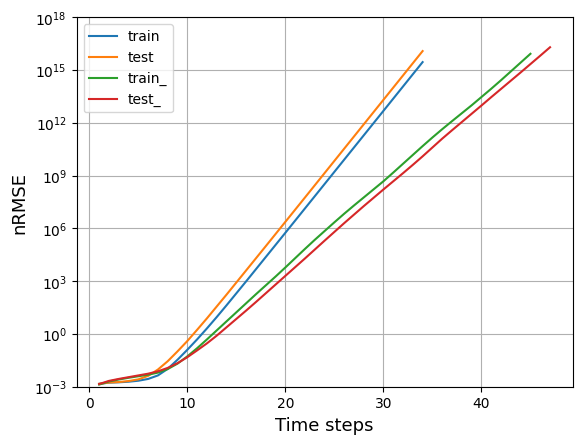

In [41]:
plt.plot(torch.arange(1,201), torch.mean(test_dim_64[0][0][0], dim=0), label="train" )
plt.plot(torch.arange(1,201), torch.mean(test_dim_64[0][1][0], dim=0), label="test" )

plt.plot(torch.arange(1,201), torch.mean(test_dim_64_1[0][0][0], dim=0), label="train_" )
plt.plot(torch.arange(1,201), torch.mean(test_dim_64_1[0][1][0], dim=0), label="test_" )

# plt.plot(torch.arange(1,201), torch.mean(test_dim_32_2[0][0][0], dim=0), label="train__" )
# plt.plot(torch.arange(1,201), torch.mean(test_dim_32_2[0][1][0], dim=0), label="test__" )

plt.legend()
plt.yscale("log")
plt.ylim([1e-3,1e18])
#plt.xlim([0,201])
plt.xlabel("Time steps", fontsize="13")
plt.ylabel("nRMSE", fontsize="13")
plt.grid()